In [1]:
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [2]:
path = Path('Dataset/asl_alphabet_train/asl_alphabet_train')
dls = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, item_tfms=Resize(128), bs=64)

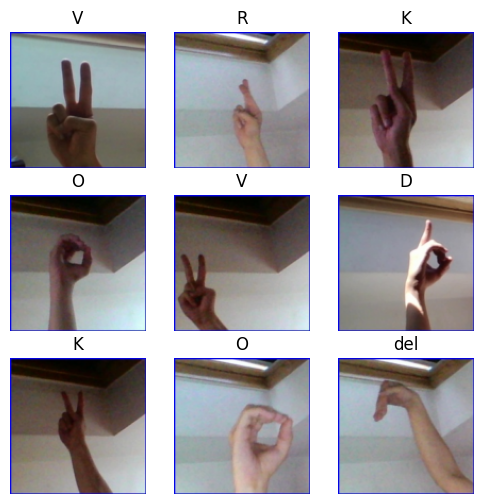

In [3]:
dls.show_batch(max_n=9, figsize=(6,6))

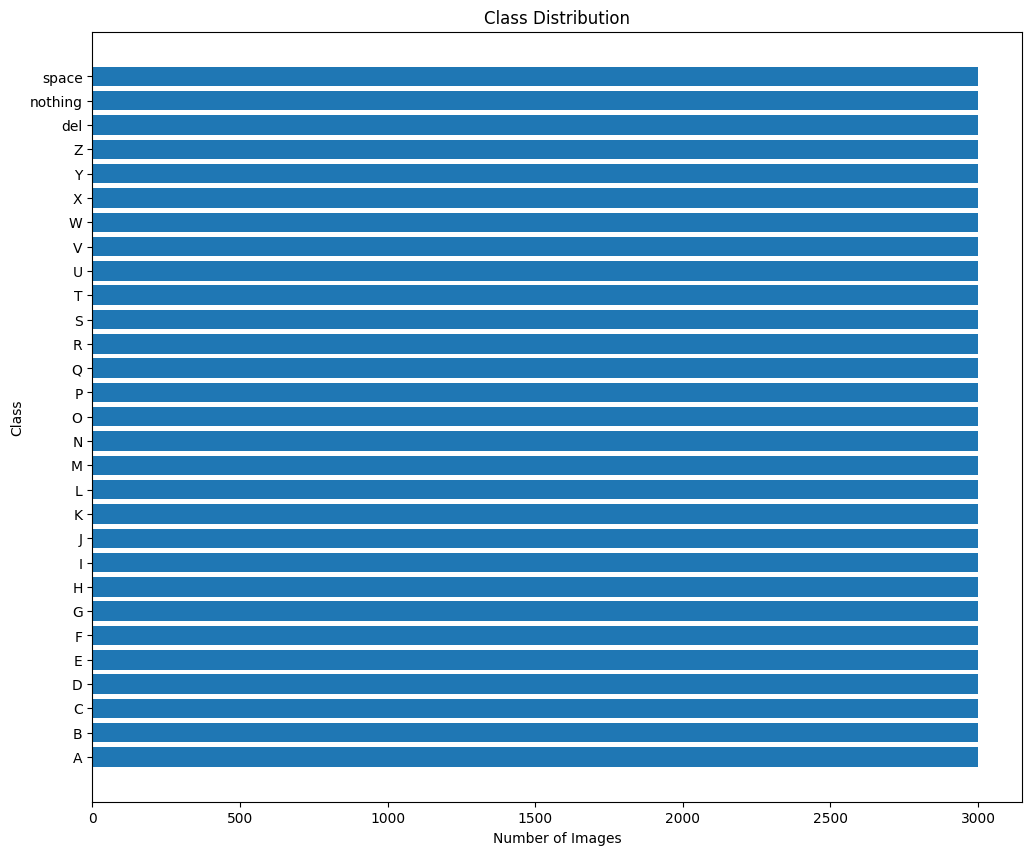

In [11]:
dataset_path = Path(dls.path)

class_dirs = [d for d in dataset_path.iterdir() if d.is_dir()]

class_counts = [len(list(class_dir.glob('*'))) for class_dir in class_dirs]

plt.figure(figsize=(12, 10))  
plt.barh(dls.vocab, class_counts)
plt.xlabel('Number of Images')
plt.ylabel('Class')
plt.title('Class Distribution')
plt.show()

Class: nothing


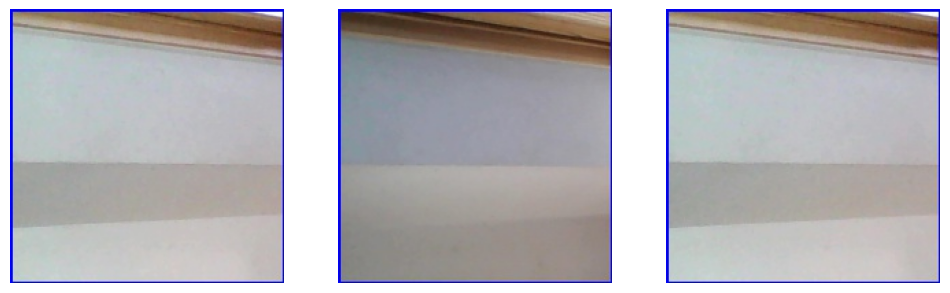

Class: space


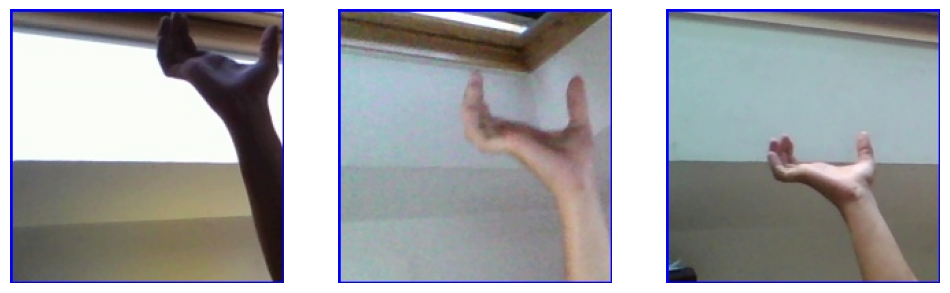

Class: del


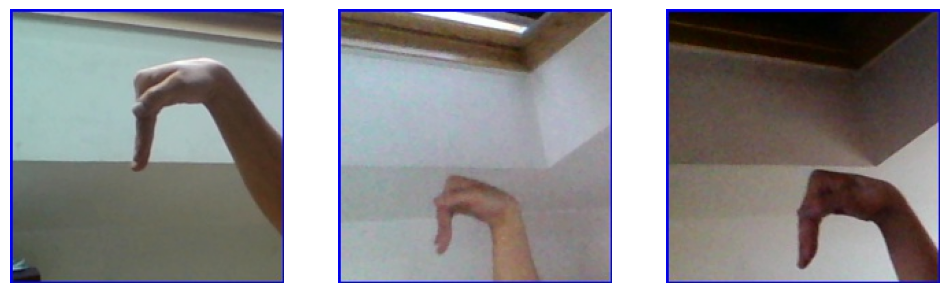

In [13]:
def show_samples_per_class(dls, classes, n=3):
    for c in classes:
        print(f"Class: {c}")
        imgs = [dls.train_ds.items[i] for i in range(len(dls.train_ds)) if dls.train_ds.items[i].parent.name == c][:n]
        fig, axes = plt.subplots(1, n, figsize=(12, 4))
        for img, ax in zip(imgs, axes):
            ax.imshow(PILImage.create(img))
            ax.axis('off')
        plt.show()

classes_to_show = ['nothing', 'space', 'del']
show_samples_per_class(dls, classes_to_show)

In [14]:
image_sizes = [PILImage.create(f).size for f in dls.train_ds.items[:5]]
print("Image sizes:", image_sizes)

Image sizes: [(200, 200), (200, 200), (200, 200), (200, 200), (200, 200)]


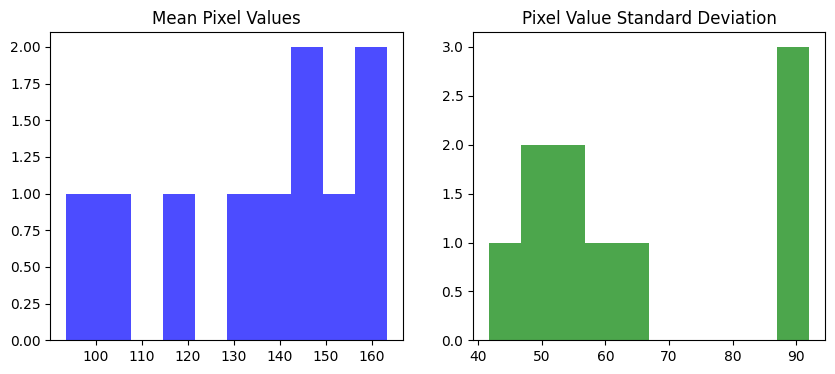

In [15]:
def get_image_stats(img_path):
    img = PILImage.create(img_path)
    img_array = np.array(img)
    mean = img_array.mean()
    std = img_array.std()
    return mean, std

image_stats = [get_image_stats(f) for f in dls.train_ds.items[:10]]
means, stds = zip(*image_stats)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(means, bins=10, color='blue', alpha=0.7)
plt.title('Mean Pixel Values')

plt.subplot(1, 2, 2)
plt.hist(stds, bins=10, color='green', alpha=0.7)
plt.title('Pixel Value Standard Deviation')

plt.show()